In [42]:
from gensim.corpora import Dictionary
from gensim.models import ldamodel
import numpy
%matplotlib inline

texts = [['bank','river','shore','water'],
        ['river','water','flow','fast','tree'],
        ['bank','water','fall','flow'],
        ['bank','bank','water','rain','river'],
        ['river','water','mud','tree'],
        ['money','transaction','bank','finance'],
        ['bank','borrow','money'], 
        ['bank','finance'],
        ['finance','money','sell','bank'],
        ['borrow','sell'],
        ['bank','loan','sell']]

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

#numpy.random.seed(1) # setting random seed to get the same results each time.
model = ldamodel.LdaModel(corpus, id2word=dictionary,num_topics=2)

model.show_topics()


[(0,
  u'0.175*"water" + 0.134*"river" + 0.101*"bank" + 0.096*"flow" + 0.091*"tree" + 0.055*"fall" + 0.055*"fast" + 0.054*"borrow" + 0.054*"sell" + 0.053*"shore"'),
 (1,
  u'0.275*"bank" + 0.123*"money" + 0.121*"finance" + 0.088*"sell" + 0.054*"water" + 0.052*"river" + 0.052*"borrow" + 0.050*"rain" + 0.050*"transaction" + 0.049*"loan"'),
 (2,
  u'0.077*"bank" + 0.074*"river" + 0.071*"tree" + 0.071*"water" + 0.069*"sell" + 0.067*"finance" + 0.065*"mud" + 0.064*"money" + 0.058*"borrow" + 0.057*"flow"')]

In [27]:
model.get_term_topics('water')

[(0, 0.086268716), (1, 0.098356031)]

In [22]:
bow_water = ['bank','water','bank']
bow_finance = ['bank','finance','bank']
bow = model.id2word.doc2bow(bow_finance) # convert to bag of words format first
print bow
doc_topics, word_topics, phi_values = model.get_document_topics(bow, per_word_topics=True)

word_topics

[(0, 2), (10, 1)]


[(0, [0, 1]), (10, [0, 1])]

In [43]:
# this is a sample method to color words. Like mentioned before, there are many ways to do this.

def color_words(model, doc):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    
    # make into bag of words
    doc = model.id2word.doc2bow(doc)
    # get word_topics
    doc_topics, word_topics, phi_values = model.get_document_topics(doc, per_word_topics=True)

    # color-topic matching
    topic_colors = { 1:'red', 0:'blue',2:'black'}
    
    # set up fig to plot
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    # a sort of hack to make sure the words are well spaced out.
    word_pos = 1/len(doc)
    
    print word_topics
    # use matplotlib to plot words
    for word, topics in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, color=topic_colors[topics[0]],  # choose just the most likely topic
                transform=ax.transAxes)
        word_pos += 0.2 # to move the word for the next iter

    ax.set_axis_off()
    plt.show()

[(0, [1, 0]), (3, [0, 1])]


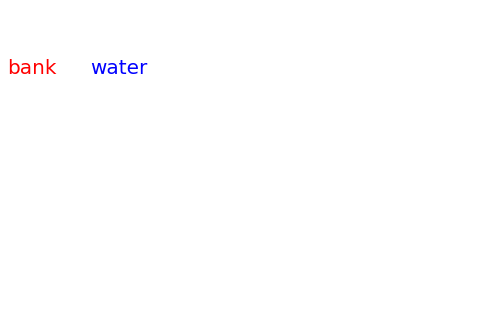

In [44]:
# our river bank document

bow_water = ['bank','water','bank']
color_words(model, bow_water)

[(0, [1, 0]), (10, [1])]


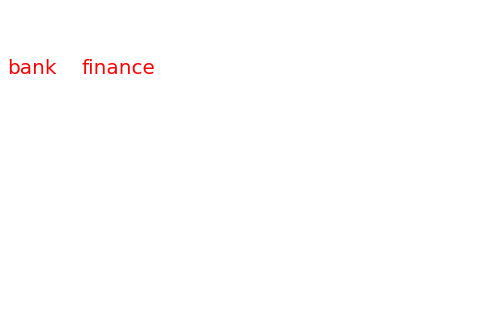

In [45]:
bow_finance = ['bank','finance','bank']
color_words(model, bow_finance)

[(0, [1, 0]), (1, [0, 1]), (3, [0, 1]), (4, [0, 1]), (6, [0, 1]), (10, [1, 0]), (11, [1, 0]), (14, [1, 0])]


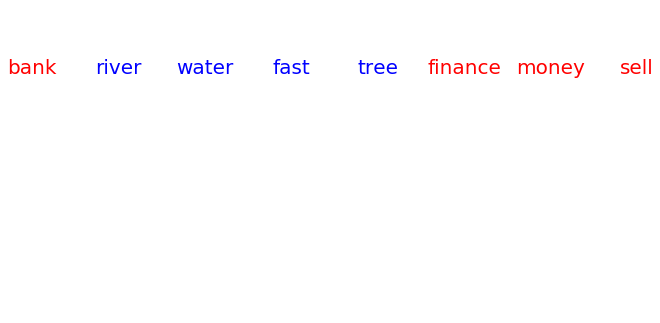

In [48]:
# sample doc with a somewhat even distribution of words among the likely topics

doc = ['bank', 'water', 'bank', 'finance', 'money','sell','river','fast','tree']
color_words(model, doc)

In [39]:
def color_words_dict(model, dictionary):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    word_topics = []
    for word_id in dictionary:
        word = str(dictionary[word_id])
        # get_term_topics returns static topics, as mentioned before
        probs = model.get_term_topics(word)
        # we are creating word_topics which is similar to the one created by get_document_topics
        try:
            if probs[0][1] >= probs[1][1]:
                word_topics.append((word_id, [0, 1]))
            else:
                word_topics.append((word_id, [1, 0]))
        # this in the case only one topic is returned
        except IndexError:
            word_topics.append((word_id, [probs[0][0]]))
            
    # color-topic matching
    topic_colors = { 1:'red', 0:'blue'}
    
    # set up fig to plot
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    # a sort of hack to make sure the words are well spaced out.
    word_pos = 1/len(doc)
         
    # use matplotlib to plot words
    for word, topics in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, color=topic_colors[topics[0]],  # choose just the most likely topic
                transform=ax.transAxes)
        word_pos += 0.2 # to move the word for the next iter

    ax.set_axis_off()
    plt.show()

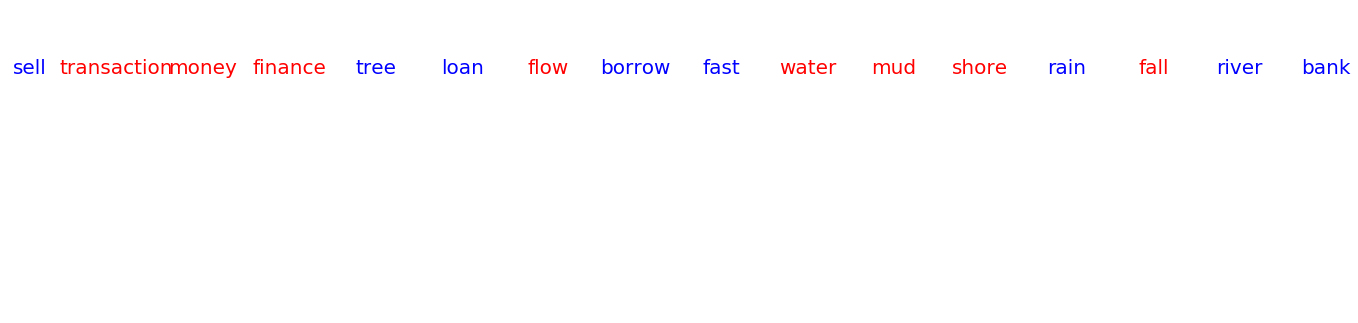

In [13]:
color_words_dict(model, dictionary)